Analyzing slave voyages

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

pd.options.display.max_rows = 100
slave_voyages = pd.read_csv("data.csv", delimiter=",", low_memory=False, encoding='utf-8')
slave_voyages

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,VOYAGEID2,Captives arrived at 1st port,Captain's name
0,1776,17888,Alexander,Bristol,"Bight of Biafra and Gulf of Guinea Islands, po...",Lucea (a) St. Lucea,NaN,325.0,"Fraser, James"
1,1792,18093,Brothers,Bristol,Bonny,Lucea (a) St. Lucea,NaN,253.0,"Williams, Joseph"
2,1793,18177,Catherine,Bristol,Bonny,Lucea (a) St. Lucea,NaN,316.0,"Wilson, James"
3,1791,18278,James,"Jamaica, place unspecified","Windward Coast, place unspecified",Lucea (a) St. Lucea,NaN,159.0,"Morley, Matthew"
4,1623,29460,NS de la Concepción,NaN,"West Central Africa and St. Helena, port unspe...",San Domingo (a) Santo Domingo,NaN,NaN,"Pereira, Pedro Gómez"
...,...,...,...,...,...,...,...,...,...
36074,1840,900177,Zenóbia,NaN,Benguela,NaN,NaN,NaN,"Oliveira, Antônio Joaquim de"
36075,1841,900182,Etna,NaN,"West Central Africa and St. Helena, port unspe...",NaN,NaN,NaN,NaN
36076,1843,900202,Active,NaN,Ambriz,NaN,NaN,NaN,NaN
36077,1851,900235,NaN,Havana,Benguela,NaN,NaN,NaN,NaN


In [5]:
slave_voyages.head(10)

,Captain's name,Crew deaths during voyage,Crew at first landing of captives,Crew at voyage outset,Date vessel departed with captives,Date vessel departed for homeport,Display in compact mode,Date vessel arrived with captives,First place where captives were landed,First place where captives were purchased,...,Place constructed,Date vessel's voyage began,Date vessel arrived at homeport,Voyage ID,Year constructed,VOYAGEID2,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Voyage dates vessel departed africa (leftafr)
0,"Renault, Jacques-Joseph-Fr",4.0,NaN,30.0,1751-06-01T00:00:00Z,NaN,NaN,1751-08-01T00:00:00Z,NaN,NaN,...,NaN,1750-11-16T00:00:00Z,1752-02-17T00:00:00Z,32499,NaN,NaN,Le Havre,"West Central Africa and St. Helena, port unspe...",Cap Français,"6,1,1751"
1,"Mouchel, J-Fr",1.0,NaN,22.0,1751-06-26T00:00:00Z,1752-02-19T00:00:00Z,NaN,1751-09-12T00:00:00Z,NaN,NaN,...,NaN,1751-01-21T00:00:00Z,1752-04-24T00:00:00Z,32500,NaN,NaN,Le Havre,"Gold Coast, Fr. definition","Martinique, place unspecified","6,26,1751"
2,"Vieillard, Grégoire",NaN,NaN,NaN,NaN,NaN,NaN,1752-01-12T00:00:00Z,NaN,NaN,...,NaN,1751-01-01T00:00:00Z,NaN,32501,NaN,NaN,Le Havre,"Africa, port unspecified","Martinique, place unspecified",NaN
3,"Donat, Thomas",8.0,NaN,26.0,NaN,NaN,NaN,1752-09-25T00:00:00Z,NaN,NaN,...,NaN,1751-10-21T00:00:00Z,1753-06-15T00:00:00Z,32502,NaN,NaN,Le Havre,Anomabu,Cayes (Les),NaN
4,"Auvray, Luc-David",18.0,NaN,41.0,NaN,NaN,NaN,1753-01-03T00:00:00Z,NaN,NaN,...,NaN,1751-11-02T00:00:00Z,1753-09-23T00:00:00Z,32503,NaN,NaN,Le Havre,Loango,Port-de-Paix,NaN
5,"Guinel, Jean",1.0,NaN,31.0,1752-11-21T00:00:00Z,NaN,NaN,1753-01-14T00:00:00Z,NaN,NaN,...,NaN,1752-03-18T00:00:00Z,1753-11-28T00:00:00Z,32504,NaN,NaN,Le Havre,"West Central Africa and St. Helena, port unspe...",Cayes (Les),"11,21,1752"
6,"Mouchel, Denis-Michel",1.0,NaN,26.0,1753-01-17T00:00:00Z,NaN,NaN,1753-03-12T00:00:00Z,NaN,NaN,...,NaN,1752-07-08T00:00:00Z,1753-08-03T00:00:00Z,32505,NaN,NaN,Le Havre,"West Central Africa and St. Helena, port unspe...",Cap Français,"1,17,1753"
7,"Renault, Jacques-Joseph-Fr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1752-09-13T00:00:00Z,1754-04-18T00:00:00Z,32506,NaN,NaN,Le Havre,"West Central Africa and St. Helena, port unspe...","Americas, port unspecified",NaN
8,"Thieulan, Robert",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1752-09-13T00:00:00Z,1754-06-20T00:00:00Z,32507,NaN,NaN,Le Havre,Malembo,"Americas, port unspecified",NaN
9,"Basset, G-Marc",0.0,NaN,25.0,1753-12-10T00:00:00Z,NaN,NaN,1754-02-01T00:00:00Z,NaN,NaN,...,NaN,1753-03-03T00:00:00Z,1754-10-03T00:00:00Z,32508,NaN,NaN,Le Havre,"West Central Africa and St. Helena, port unspe...",Cap Français,"12,10,1753"


In [33]:
slave_voyages.sample(10)

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,ptdepimp,Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
10399,1852,4446,Rapid (a) Emperatriz,Baltimore,Cardenas,840.0,NaN
4214,1846,3584,Maria,"Bahia, place unspecified","Bahia, place unspecified",160.0,NaN
12404,1784,84036,Louisa,Liverpool,Charleston,62.0,"Cowell<br/> Charters, Thomas<br/> Court, John"
28281,1818,48644,Flor do Mar,Rio de Janeiro,"Pernambuco, place unspecified",NaN,"Sá, Joaquim Manoel de"
32612,1839,2676,Emprendedor (a) Boca Negra,Cadiz,NaN,NaN,"Santos, Manoel Antônio dos<br/> Lavandeira, Fr..."
1459,1716,94842,Indian King,Liverpool,Saint John (Antigua),NaN,"Blevin, James"
6585,1674,11575,Maria,Zeeland,"Barbados, place unspecified",NaN,"Turner, Ephraim"
10240,1790,31279,Bailli de Suffren,Nantes,Cap Français,400.0,"Galland, Jos"
3397,1730,50548,NS da Conceição e S Antônio da Mouraria,"Bahia, place unspecified","Bahia, place unspecified",NaN,"Brito, Antônio Nunes de"
30400,1613,28129,NS de la Piedad y Merced,NaN,"Puerto Rico, port unspecified",NaN,"Orta, Miguel de"


In [34]:
slave_voyages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36079 entries, 0 to 36078
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Year of arrival at port of disembarkation                                          36079 non-null  int64  
 1   Voyage ID                                                                          36079 non-null  int64  
 2   Vessel name                                                                        34460 non-null  object 
 3   ptdepimp                                                                           31634 non-null  object 
 4   Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place  31845 non-null  object 
 5   Captives arrived at 1st port                                                       18290 non-null  floa

By default, df.describe() will only compute columns with numerical data. To include all columns, we can use include='all.



In [35]:
slave_voyages.describe()

,Year of arrival at port of disembarkation,Voyage ID,Captives arrived at 1st port
count,36079.000000,36079.000000,18290.00000
mean,1764.518196,42863.529560,276.42105
std,59.246381,72735.051231,159.01946
min,1514.000000,1.000000,0.00000
25%,1732.000000,16129.500000,158.00000
50%,1773.000000,32538.000000,254.00000
75%,1806.000000,50328.500000,371.00000
max,1866.000000,900237.000000,1700.00000


In [37]:
slave_voyages[["ptdepimp"]].value_counts()[:10]

ptdepimp                          
Liverpool                             4971
Bahia, place unspecified              4479
London                                3131
Rio de Janeiro                        2546
Bristol                               2085
Nantes                                1729
Pernambuco, place unspecified         1312
Havana                                1147
Southeast Brazil, port unspecified    1125
Lisbon                                1097
Name: count, dtype: int64

<Axes: title={'center': 'Location of port city, most to least frequent'}, xlabel='ptdepimp'>

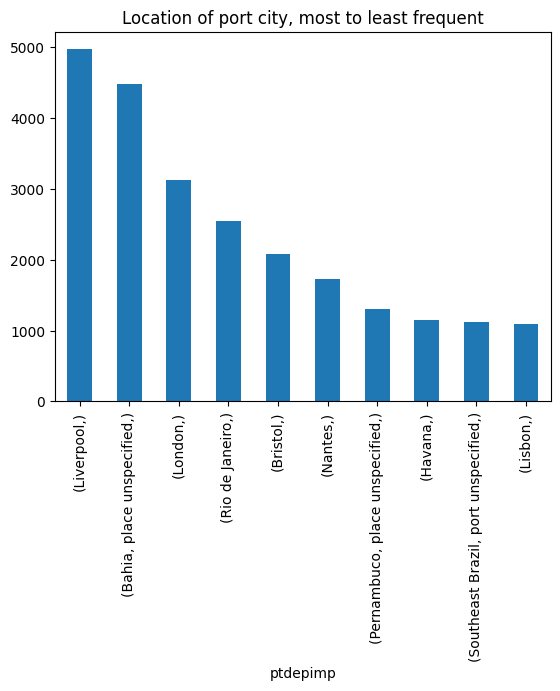

In [39]:
slave_voyages[["ptdepimp"]].value_counts()[:10].plot(kind="bar", title="Location of port city, most to least frequent")

We specify the title with the title= parameter and the kind of plot by altering the kind= parameter:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

We type the name of the DataFrame followed by square brackets and then, instead of inserting a column name, we insert a True/False condition. 

In [41]:
london_filter = slave_voyages["ptdepimp"] == "London"
slave_voyages[london_filter]

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,ptdepimp,Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
48,1790,83113,Pitt,London,Lucea (a) St. Lucea,154.0,"Muir<br/> Hunter, John"
49,1793,81071,Duchess of Portland,London,Lucea (a) St. Lucea,98.0,"Lamb, Edward<br/> Taylor"
50,1789,81527,Friendship,London,Lucea (a) St. Lucea,25.0,"Vaughan, Richard<br/> Lamb, Edward"
51,1781,80069,Adventure,London,Lucea (a) St. Lucea,360.0,"Muir, John"
56,1699,21420,William and Jane,London,French Africa (Goree or Senegal),49.0,"Beckford, Robert"
...,...,...,...,...,...,...,...
35641,1740,75589,Ann,London,NaN,NaN,Elsworthy
35642,1721,75599,Hanibal,London,NaN,NaN,"Ousley, Christopher (a) Housby"
35643,1724,75635,Hester and Jane,London,NaN,NaN,"Bond, Peter"
35721,1657,99022,Negro Merchant,London,NaN,NaN,NaN


In [42]:
slaves_filter = slave_voyages["Captives arrived at 1st port"] > 100
slave_voyages[slaves_filter]

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,ptdepimp,Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
0,1776,17888,Alexander,Bristol,Lucea (a) St. Lucea,325.0,"Fraser, James"
1,1792,18093,Brothers,Bristol,Lucea (a) St. Lucea,253.0,"Williams, Joseph"
2,1793,18177,Catherine,Bristol,Lucea (a) St. Lucea,316.0,"Wilson, James"
3,1791,18278,James,"Jamaica, place unspecified",Lucea (a) St. Lucea,159.0,"Morley, Matthew"
38,1605,42968,NS de Consolaçion,NaN,San Domingo (a) Santo Domingo,232.0,"Jorge, Bartolomé"
...,...,...,...,...,...,...,...
34156,1825,34555,Céron,Bordeaux,???,351.0,"Métayer, Jean-Baptiste"
35100,1802,82970,Orange Grove,Liverpool,???,254.0,"Payne, Thomas"
35147,1804,83527,Sarah,Liverpool,???,219.0,"Kennedy, Henry"
35678,1776,92538,John,Liverpool,NaN,474.0,"Heblethwaite, John"


In [43]:
slave_voyages[london_filter]["Captain's name"].value_counts()

Captain's name
Prince, Lawrence                                       12
Clarke, Robert                                         12
Snelgrave, William                                     12
Wilson, Thomas                                         11
Lone, Arthur                                           10
                                                       ..
Creed, Thomas                                           1
Olson, Branson<br/> Goddard, Francis                    1
Corbin, Edmund                                          1
Pick, John                                              1
Pyle, William<br/> Pulman, Henry<br/> Carnaby, John     1
Name: count, Length: 2054, dtype: int64

To filter and count the number of missing/not missing values in a dataset, we can use the special .isna() and .notna() methods on a DataFrame or Series object.

3 % of voyages have no info of captain's name, while 97% do

In [45]:
slave_voyages[london_filter]["Captain's name"].notna().value_counts(normalize=True)

Captain's name
True     0.978282
False    0.021718
Name: proportion, dtype: float64

In [46]:
london_departures = slave_voyages[london_filter]
london_departures[slave_voyages[london_filter]["Captain's name"].notna()]

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,ptdepimp,Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
48,1790,83113,Pitt,London,Lucea (a) St. Lucea,154.0,"Muir<br/> Hunter, John"
49,1793,81071,Duchess of Portland,London,Lucea (a) St. Lucea,98.0,"Lamb, Edward<br/> Taylor"
50,1789,81527,Friendship,London,Lucea (a) St. Lucea,25.0,"Vaughan, Richard<br/> Lamb, Edward"
51,1781,80069,Adventure,London,Lucea (a) St. Lucea,360.0,"Muir, John"
56,1699,21420,William and Jane,London,French Africa (Goree or Senegal),49.0,"Beckford, Robert"
...,...,...,...,...,...,...,...
35640,1716,75588,Ann and Priscilla,London,NaN,NaN,"Sayers, Richard"
35641,1740,75589,Ann,London,NaN,NaN,Elsworthy
35642,1721,75599,Hanibal,London,NaN,NaN,"Ousley, Christopher (a) Housby"
35643,1724,75635,Hester and Jane,London,NaN,NaN,"Bond, Peter"


Because the .count() method always excludes NaN values, we can also count the number of values in each column and divide by the total number of rows in each column (len()) to find the percentage of not blank data in every column.

numer of columns = len(df.columns)

In [47]:
slave_voyages.count() / len(slave_voyages)

Year of arrival at port of disembarkation                                            1.000000
Voyage ID                                                                            1.000000
Vessel name                                                                          0.955126
ptdepimp                                                                             0.876798
Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place    0.882646
Captives arrived at 1st port                                                         0.506943
Captain's name                                                                       0.888024
dtype: float64

In [48]:
slave_voyages["Captain\'s name"].fillna("N/A")

0                       Fraser, James
1                    Williams, Joseph
2                       Wilson, James
3                     Morley, Matthew
4                Pereira, Pedro Gómez
                     ...             
36074    Oliveira, Antônio Joaquim de
36075                             N/A
36076                             N/A
36077                             N/A
36078                             N/A
Name: Captain's name, Length: 36079, dtype: object

In [55]:
slave_voyages = slave_voyages.rename(columns={"Voyage itinerary imputed port where began (ptdepimp) place": "ptdepimp"})
slave_voyages

,Year of arrival at port of disembarkation,Vessel name,ptdepimp,Captives arrived at 1st port,Captain's name
0,1776,Alexander,Bristol,325.0,"Fraser, James"
1,1792,Brothers,Bristol,253.0,"Williams, Joseph"
2,1793,Catherine,Bristol,316.0,"Wilson, James"
3,1791,James,"Jamaica, place unspecified",159.0,"Morley, Matthew"
4,1623,NS de la Concepción,NaN,NaN,"Pereira, Pedro Gómez"
...,...,...,...,...,...
36074,1840,Zenóbia,NaN,NaN,"Oliveira, Antônio Joaquim de"
36075,1841,Etna,NaN,NaN,NaN
36076,1843,Active,NaN,NaN,NaN
36077,1851,NaN,Havana,NaN,NaN


In [56]:
slave_voyages = slave_voyages.drop(columns="Voyage ID")


KeyError: "['Voyage ID'] not found in axis"

In [57]:
slave_voyages["after US abolishment of slave trade"] = slave_voyages["Year of arrival at port of disembarkation"] > 1807
slave_voyages

,Year of arrival at port of disembarkation,Vessel name,ptdepimp,Captives arrived at 1st port,Captain's name,after US abolishment of slave trade
0,1776,Alexander,Bristol,325.0,"Fraser, James",False
1,1792,Brothers,Bristol,253.0,"Williams, Joseph",False
2,1793,Catherine,Bristol,316.0,"Wilson, James",False
3,1791,James,"Jamaica, place unspecified",159.0,"Morley, Matthew",False
4,1623,NS de la Concepción,NaN,NaN,"Pereira, Pedro Gómez",False
...,...,...,...,...,...,...
36074,1840,Zenóbia,NaN,NaN,"Oliveira, Antônio Joaquim de",True
36075,1841,Etna,NaN,NaN,NaN,True
36076,1843,Active,NaN,NaN,NaN,True
36077,1851,NaN,Havana,NaN,NaN,True


In [59]:
slave_voyages.sort_values(by="Year of arrival at port of disembarkation", ascending=False)

,Year of arrival at port of disembarkation,Vessel name,ptdepimp,Captives arrived at 1st port,Captain's name,after US abolishment of slave trade
13632,1866,NaN,NaN,700.0,NaN,True
33932,1866,NaN,Cadiz,NaN,NaN,True
33931,1866,Daomé,Lisbon,NaN,NaN,True
33984,1865,Amélia,Cadiz,NaN,"Marta, Sebastião da Silva",True
26205,1865,NaN,NaN,650.0,NaN,True
...,...,...,...,...,...,...
13116,1526,NaN,NaN,40.0,"Carega, Esteban<br/> Basiniana, Esteban",False
22934,1520,Santa María de la Luz,NaN,44.0,NaN,False
30489,1519,S Catalina,Seville,NaN,"Vizcayno, Juan",False
25181,1516,NaN,NaN,NaN,"Coimbra, Cristóvão",False


In [ ]:
slave_voyages.groupby('after US abolishment of slave trade').count()